# ASSIGNMENT 5   

# -By Amber Sethi and Alizae Pardiwala

### PROBLEM 5.1- Answer

Total number of classified fraudulent cases = 88 ;
Correctly classified fraudulent cases = 30 ;
Incorrectly classified fraudulent cases = 88-30 = 58 ;


Total number of classified non-fraudulent cases = 952 ; 
Correctly classified non-fraudulent cases = 920 ;
Incorrectly classified non-fraudulent cases = 952-920 = 32 ;


**Error Rate = Total misclassification/ Total Transaction**

Total misclassification = 58+32 = 90 ;
Total Transaction = 58+30+920+32 = 1040 ;

**Therefore, overall error rate = 0.0865 = 8.65%**


**Accuracy Rate = Total correctly classified/ Total Transaction**

Total correct classification = 30+920 = 950 ;
Total Transaction = 58+30+920+32 = 1040 ;

**Therefore, overall accuracy rate = 0.9135 = 91.35%**
      


### PROBLEM 5.4 (A,B,C,D) - Answer

**a. Decile lifts chart helps determine how effectively we can “skim the cream” by selecting a relatively small number of records and getting a relatively large portion of the responders. The first and the second bar tells us that most of the loyal customers are within the first two bars. Therefore, the first bar i.e 10 percentile gives us lift of 7 and the 2nd bar i.e., 20 percentile gives us lift of more than 2 percentile.**

**b. In practice, this information tells us that if we choose the first 10%, then we will get the highest number of responders or transactions for the target variable, rather than choosing random 10%.**

**c. If we classify everything as non-fraudulent, then the error rate will be as follows:**

**We are now treating the incorrectly classified non-fraudulent cases as correctly classified and correctly classified fraudulent cases as non-fraudulent. Therefore, the sum of the two numbers from the previous solution = 32+30 = 62. Hence, the error rate = 62/1040 = 0.0596 = 5.96%. This result proves decrease in the error rate.**


**d. In this case, lifts chart will help us to find out the transactions that can be worked with to get maximum number of fraudulent transactions. Here we can see the first 10 and 20% will help us get the maximum fraudulent transactions.**

**PROBLEM 5.7 (A,B)-Solution**

**Part A**

In [1]:
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt

from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

In [2]:
df = pd.read_csv('Propensity.csv')
df.head()
class_names = ['0', '1']

In [3]:
Predicted = [1 if p > 0.25 else 0 for p in df.Propensity]
classificationSummary(df.Actual, Predicted, class_names=['0', '1'])

Confusion Matrix (Accuracy 0.6000)

       Prediction
Actual 0 1
     0 9 8
     1 0 3


In [4]:
Predicted = [1 if p > 0.5 else 0 for p in df.Propensity]
classificationSummary(df.Actual, Predicted, class_names=['0', '1'])

Confusion Matrix (Accuracy 0.9000)

       Prediction
Actual  0  1
     0 15  2
     1  0  3


In [5]:
Predicted = [1 if p > 0.75 else 0 for p in df.Propensity]
classificationSummary(df.Actual, Predicted, class_names=['0', '1'])

Confusion Matrix (Accuracy 0.9500)

       Prediction
Actual  0  1
     0 17  0
     1  1  2


In [6]:
fpr, tpr, _ = roc_curve(df.Actual, df.Propensity)
roc_auc = auc(fpr, tpr)

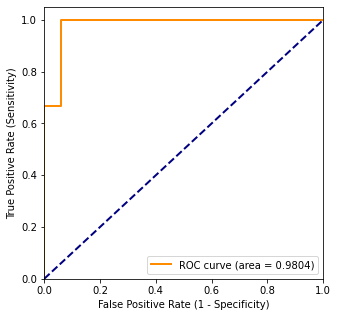

In [7]:
plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

**Part B**

In [8]:
df = df.sort_values(by=['Propensity'], ascending=False)

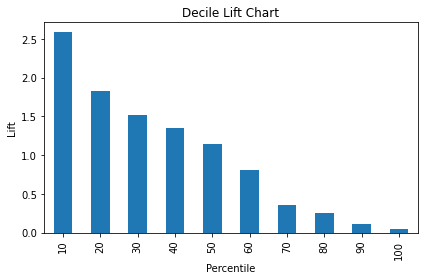

In [9]:
liftChart(df.Propensity, labelBars=False)
plt.tight_layout()
plt.show()

### PROBLEM 9.1 

### Part A

In [10]:
%matplotlib inline
import matplotlib.pylab as plt

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [11]:
ebay_df = pd.read_csv('eBayAuctions(1).csv')
df

,Propensity,Actual
3,0.82,1
15,0.79,1
7,0.59,0
6,0.55,1
1,0.52,0
10,0.43,0
16,0.42,0
5,0.42,0
2,0.38,0
4,0.33,0


In [12]:
ebay_df = ebay_df.astype(str)

In [13]:
ebay_df

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
...,...,...,...,...,...,...,...,...
1967,Automotive,US,2992,5,Sun,359.95,359.95,0
1968,Automotive,US,21,5,Sat,610.0,300.0,1
1969,Automotive,US,1400,5,Mon,549.0,549.0,0
1970,Automotive,US,57,7,Fri,820.0,650.0,1


In [14]:
#removing "?" from column name
ebay_df.columns = ebay_df.columns.str.replace('?', '')

<ipython-input-14-7dc554d8b314>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  ebay_df.columns = ebay_df.columns.str.replace('?', '')


In [15]:
#Looking at our object and variable types
ebay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Category      1972 non-null   object
 1   currency      1972 non-null   object
 2   sellerRating  1972 non-null   object
 3   Duration      1972 non-null   object
 4   endDay        1972 non-null   object
 5   ClosePrice    1972 non-null   object
 6   OpenPrice     1972 non-null   object
 7   Competitive   1972 non-null   object
dtypes: object(8)
memory usage: 123.4+ KB


In [16]:
ebay_df.dtypes

Category        object
currency        object
sellerRating    object
Duration        object
endDay          object
ClosePrice      object
OpenPrice       object
Competitive     object
dtype: object

In [17]:
ebay_df.columns

Index(['Category', 'currency', 'sellerRating', 'Duration', 'endDay',
       'ClosePrice', 'OpenPrice', 'Competitive'],
      dtype='object')

In [18]:
#creating dummy variable
ebay_df = pd.get_dummies(ebay_df,columns=['Category', 'endDay', 'currency'])

In [19]:
ebay_df.columns

Index(['sellerRating', 'Duration', 'ClosePrice', 'OpenPrice', 'Competitive',
       'Category_Antique/Art/Craft', 'Category_Automotive', 'Category_Books',
       'Category_Business/Industrial', 'Category_Clothing/Accessories',
       'Category_Coins/Stamps', 'Category_Collectibles', 'Category_Computer',
       'Category_Electronics', 'Category_EverythingElse',
       'Category_Health/Beauty', 'Category_Home/Garden', 'Category_Jewelry',
       'Category_Music/Movie/Game', 'Category_Photography',
       'Category_Pottery/Glass', 'Category_SportingGoods',
       'Category_Toys/Hobbies', 'endDay_Fri', 'endDay_Mon', 'endDay_Sat',
       'endDay_Sun', 'endDay_Thu', 'endDay_Tue', 'endDay_Wed', 'currency_EUR',
       'currency_GBP', 'currency_US'],
      dtype='object')

In [20]:
#converting duration to categorical
ebay_df.Duration = ebay_df.Duration.astype('category')

In [21]:
#defining our predictor and outcome
X=ebay_df.drop(columns=['Competitive'])
y=ebay_df['Competitive']

In [22]:
# fit the tree with 1 split
classTree = DecisionTreeClassifier(random_state=0, max_depth=1)
classTree.fit(X, y)

DecisionTreeClassifier(max_depth=1, random_state=0)

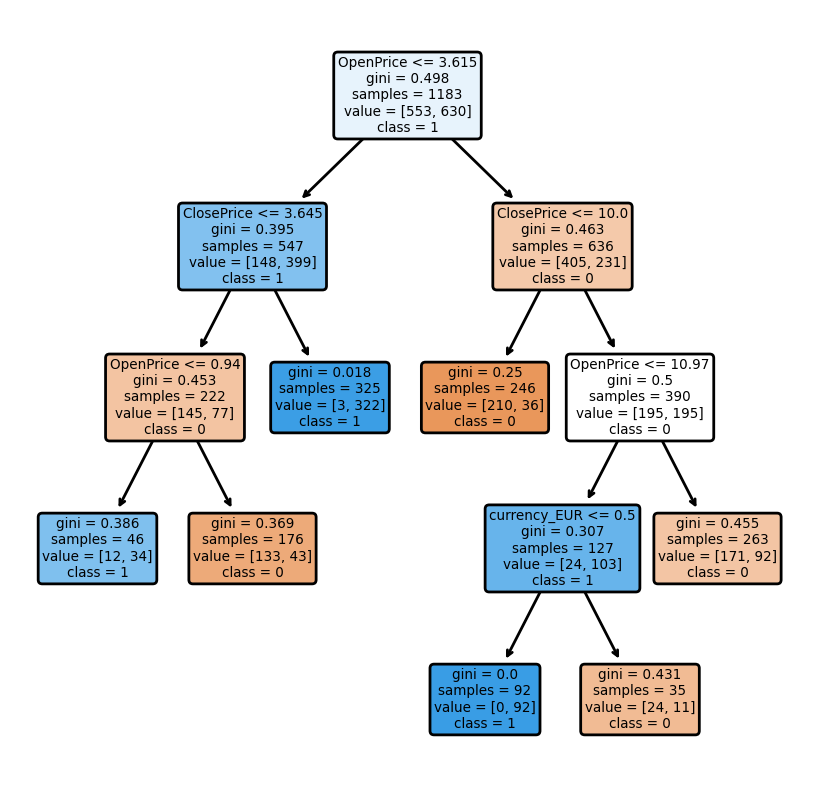

In [23]:
#split the data set
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

smallClassTree = DecisionTreeClassifier(max_depth=7, min_samples_split=50, min_impurity_decrease=0.01)
smallClassTree.fit(train_X, train_y)

#plotDecisionTree(smallClassTree, feature_names=train_X.columns)
                      # Set dpi (100 - 300) to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=200)

tree.plot_tree(smallClassTree,
           feature_names = train_X.columns, 
           class_names=classTree.classes_,
           filled = True,rounded=True);
plt.show()

In [24]:
#Classifying the training and validation set to better explain our errors
classificationSummary(train_y, smallClassTree.predict(train_X))
classificationSummary(valid_y, smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8335)

       Prediction
Actual   0   1
     0 538  15
     1 182 448
Confusion Matrix (Accuracy 0.7947)

       Prediction
Actual   0   1
     0 342  11
     1 151 285


### Part D

In [25]:
predictors = ['sellerRating', 'ClosePrice', 'OpenPrice']
outcome = 'Competitive'

X = pd.get_dummies(ebay_df[predictors], drop_first=True)
Y = ebay_df[outcome]

train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.4, random_state=1)

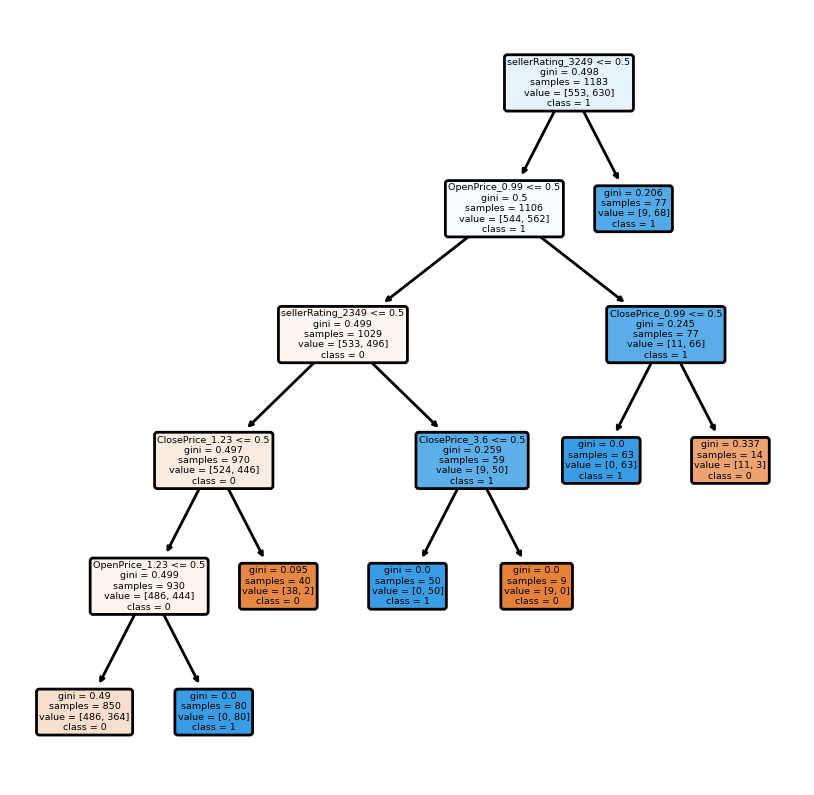

In [26]:
smallClassTree1 = DecisionTreeClassifier(max_depth=7, min_samples_split=50, min_impurity_decrease=0.01)
smallClassTree1.fit(train_X, train_Y)

#plotDecisionTree(smallClassTree, feature_names=train_X.columns)
                      # Set dpi (100 - 300) to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=200)

tree.plot_tree(smallClassTree1,
           feature_names = train_X.columns, 
           class_names=classTree.classes_,
           filled = True,rounded=True);
plt.show()

## Problem 9.3

### Part A

In [27]:
toyotaCorolla_df = pd.read_csv('ToyotaCorolla(6).csv')

toyotaCorolla_df = toyotaCorolla_df.rename(columns={'Age_08_04': 'Age', 'Quarterly_Tax': 'Tax'})

In [28]:
toyotaCorolla_df.dtypes

Id                    int64
Model                object
Price                 int64
Age                   int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
Fuel_Type            object
HP                    int64
Met_Color             int64
Color                object
Automatic             int64
CC                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Tax                   int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim        

In [29]:
toyotaCorolla_df = pd.get_dummies(toyotaCorolla_df, prefix='_', drop_first=True, columns= ['Fuel_Type'])

In [30]:
toyotaCorolla_df.dtypes

Id                    int64
Model                object
Price                 int64
Age                   int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
HP                    int64
Met_Color             int64
Color                object
Automatic             int64
CC                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Tax                   int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim          int64
Radio_cassette      

In [31]:
predictors = ['Age', 'KM', '__Diesel', '__Petrol', 'HP', 'Met_Color', 'Automatic', 'CC', 
              'Doors', 'Tax', 'Weight', 'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 
              'CD_Player', 'Powered_Windows',
              'Sport_Model', 'Tow_Bar']
outcome = ['Price']


XX = toyotaCorolla_df[predictors]
YY = toyotaCorolla_df[outcome]

train_XX, valid_XX, train_YY, valid_YY = train_test_split(XX, YY, test_size=0.4, random_state=1)

In [32]:
# user grid search to find optimized tree
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_XX, train_YY)
print('Initial parameters: ', gridSearch.best_params_)

Initial parameters:  {'max_depth': 20, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [33]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [14, 15, 16, 18, 20], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_XX, train_YY)
print('Improved parameters: ', gridSearch.best_params_)

Improved parameters:  {'max_depth': 7, 'min_impurity_decrease': 0.001, 'min_samples_split': 20}


In [34]:
regTree = gridSearch.best_estimator_

In [35]:
regressionSummary(train_YY, regTree.predict(train_XX))
regressionSummary(valid_YY, regTree.predict(valid_XX))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1013.3651
            Mean Absolute Error (MAE) : 725.7791
          Mean Percentage Error (MPE) : -0.8768
Mean Absolute Percentage Error (MAPE) : 7.0665

Regression statistics

                      Mean Error (ME) : 35.3257
       Root Mean Squared Error (RMSE) : 1243.7815
            Mean Absolute Error (MAE) : 944.0317
          Mean Percentage Error (MPE) : -0.8787
Mean Absolute Percentage Error (MAPE) : 9.3631


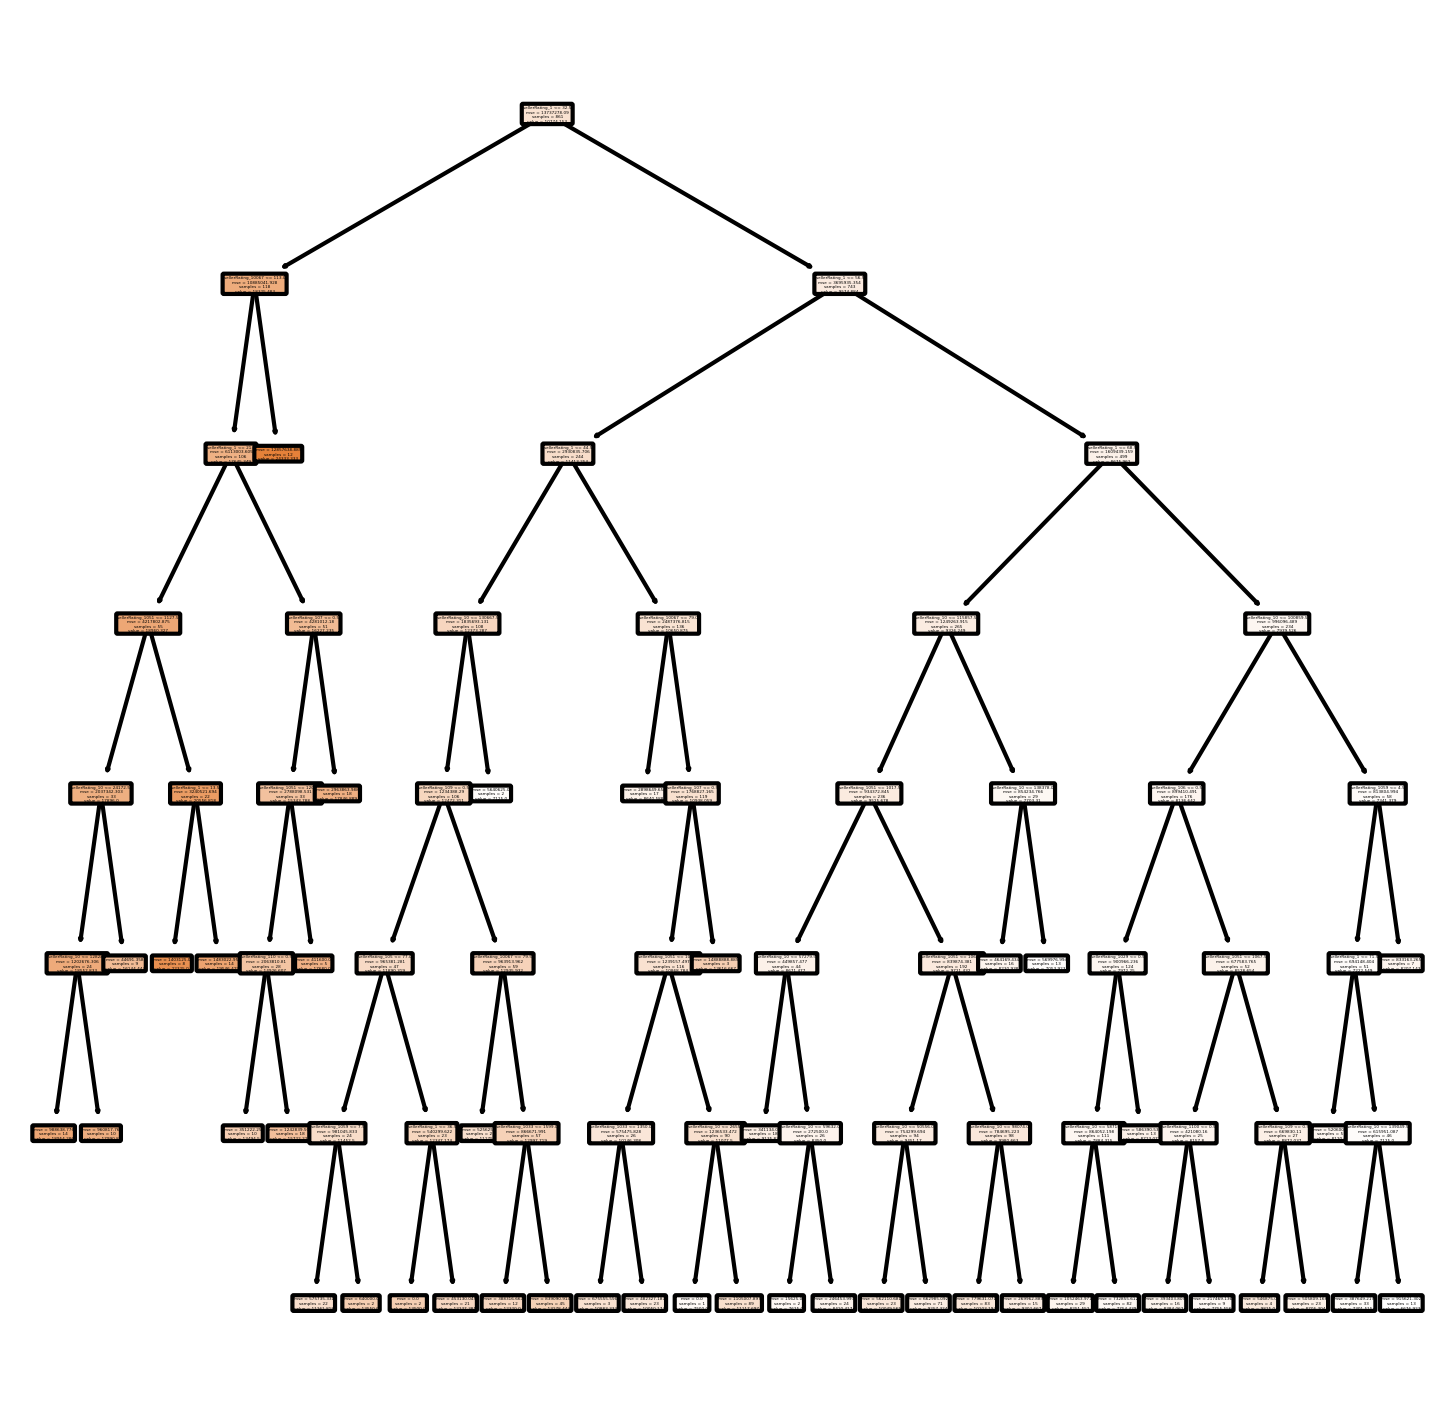

In [36]:
#plotDecisionTree(regTree, feature_names=train_X.columns)
#plotDecisionTree(regTree, feature_names=train_X.columns, rotate=True)


# Set dpi (100 - 300) to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)

tree.plot_tree(regTree, 
               feature_names=train_X.columns, 
           class_names=classTree.classes_,
           filled = True,rounded=True);
plt.show()

In [37]:
# Variable importance
importance = pd.DataFrame({'features': train_XX.columns, 
                           'importance': regTree.feature_importances_})
importance.sort_values(by='importance', ascending=False)

,features,importance
0,Age,0.885175
4,HP,0.051820
1,KM,0.024803
10,Weight,0.018517
14,Automatic_airco,0.008686
16,Powered_Windows,0.003003
17,Sport_Model,0.002915
12,Guarantee_Period,0.001422
13,Airco,0.001036
9,Tax,0.000859


**i. The most important car specifications for pedicting a car's price are: Age, KM, HP and Weight**

In [38]:
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt

from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

In [39]:
# train linear regression model
reg=LinearRegression()
reg.fit(train_XX, train_YY)

LinearRegression()

In [40]:
# evaluate performance
# training
regressionSummary(train_YY, reg.predict(train_XX))
# validation
regressionSummary(valid_YY, reg.predict(valid_XX))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1152.1977
            Mean Absolute Error (MAE) : 840.3032
          Mean Percentage Error (MPE) : -0.9361
Mean Absolute Percentage Error (MAPE) : 8.2606

Regression statistics

                      Mean Error (ME) : 198.2759
       Root Mean Squared Error (RMSE) : 2987.2232
            Mean Absolute Error (MAE) : 981.6632
          Mean Percentage Error (MPE) : 0.5769
Mean Absolute Percentage Error (MAPE) : 9.4138


In [41]:
pred_error_train = pd.DataFrame({'residual': train_YY - reg.predict(train_XX), 'data set': 'training'})

pred_error_valid = pd.DataFrame({'residual': valid_YY - reg.predict(valid_XX), 'data set': 'validation'})

ValueError: If using all scalar values, you must pass an index

In [42]:
boxdata_df = pred_error_train.append(pred_error_valid)
boxdata_df.boxplot(by='data set').set_ylim(-6500, 6500)
plt.title('')

NameError: name 'pred_error_train' is not defined